# DIJKSTRA ALGORITHM VISUALIZATION PROJECT

Dijkstra algorithm is a single-source shortest path algorithm. Here, single-source means that only one source is given, and we have to find the shortest path from the source to all the nodes.

Dijkstra's algorithm allows us to find the shortest path between any two vertices of a graph.

It differs from the minimum spanning tree because the shortest distance between two vertices might not include all the vertices of the graph.
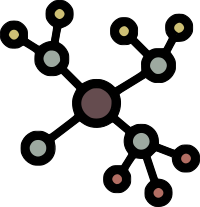

### Libraries (Importing)
- Tkinter is used for GUI creation
    - Tk have messagebox which helps in creation message box
- pygame: helps in designing the video games
- sys: used to manipulate different parts of the Python runtime environment

In [13]:
from tkinter import messagebox, Tk 
import pygame
import sys

### Set Some Properties of pygame Window

In [14]:
pygame.display.set_caption('Dijkstra Algorithm Visualization')
Icon = pygame.image.load('icon.png')
pygame.display.set_icon(Icon)

In [15]:
win_width = 750 
win_height = 750

window = pygame.display.set_mode((win_width, win_height))

cols = 25
rows = 25

box_width = win_width // cols
box_height = win_height // rows

grid = []
queue = []
path = []

### Set Some Properties of Pixel/Box

In [16]:
class Box:
    def __init__(self, i, j):
        self.x = i
        self.y = j
        self.start = False
        self.wall = False
        self.target = False
        self.queued = False
        self.visited = False
        self.neighbours = []
        self.prior = None

    def draw(self, win, color):
        pygame.draw.rect(win, color, (self.x * box_width, self.y * box_height, box_width -2, box_height -2))

    def set_neighbours(self):
        if self.x > 0:
            self.neighbours.append(grid[self.x - 1][self.y])
        if self.x < cols - 1:
            self.neighbours.append(grid[self.x + 1][self.y])
        if self.y > 0:
            self.neighbours.append(grid[self.x][self.y - 1])
        if self.y < rows - 1:
            self.neighbours.append(grid[self.x][self.y + 1])

### Grid Creation & Setting Neighbours

In [17]:
#create grid
for i in range(cols):
    arr = []
    for j in range(rows):
        arr.append(Box(i, j))
    grid.append(arr)

#set neighbours
for i in range(cols):
    for j in range(rows):
        grid[i][j].set_neighbours()

start_box = grid[0][0]
start_box.start = True
start_box.visited = True
queue.append(start_box)

###  Main Function & Execution
- Events happening will be handled here
- Mouse Controls are specified
    - Drawing of walls
    - Target Setting
- begin_search: searches for everything like,
    - Algo checks for every element
    - It checks whether the element is target (in yellow) or wall (in black) or void (in white/green)
    - It also represents the neighbouring position (in red)
- main function also helps in filling the respective colors

In [18]:
def main():
    begin_search = False
    target_box_set = False
    searching = True
    target_box = None

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            
            #mouse controlls
            elif event.type == pygame.MOUSEMOTION:
                x = pygame.mouse.get_pos()[0]
                y = pygame.mouse.get_pos()[1]
                # Draw wall
                if event.buttons[0]:
                    i = x // box_width
                    j = y // box_height
                    grid[i][j].wall = True
                #set target
                if event.buttons[2] and not target_box_set:
                    i = x // box_width
                    j = y // box_height
                    target_box = grid[i][j]
                    target_box.target = True
                    target_box_set = True
            
            # start algorithm
            if event.type == pygame.KEYDOWN and target_box_set:
                begin_search = True

        if begin_search:
            if len(queue) > 0 and searching:
                current_box = queue.pop(0)
                current_box.visited = True
                if current_box == target_box:
                    searching = False
                    while current_box.prior != start_box:
                        path.append(current_box.prior)
                        current_box = current_box.prior
                else:
                    for neighbour in current_box.neighbours:
                        if not neighbour.queued and not neighbour.wall:
                            neighbour.queued = True
                            neighbour.prior = current_box
                            queue.append(neighbour)
            else:
                if searching:
                    Tk().wm_withdraw()
                    messagebox.showinfo("No Solution", "There is no solution!")
                    searching = False

        window.fill((192, 192, 192))

        for i in range(cols):
            for j in range(rows):
                box = grid[i][j]
                box.draw(window,(255,255,255))

                if box.queued:
                    box.draw(window,(255,0,0))
                if box.visited:
                    box.draw(window,(0,255,0))

                if box in path:
                    box.draw(window,(0,0,255))

                if box.start:
                    box.draw(window,(0,255,255))
                if box.wall:
                    box.draw(window,(25,25,25))
                if box.target:
                    box.draw(window,(255,255,0))

        pygame.display.flip()

main()

SystemExit: 